### Testing and Sample Usage

In [1]:
import matching
import trading
import importlib
importlib.reload(matching)
importlib.reload(trading)
from matching import MatchingEngine
from trading import TradingSystem

ME = MatchingEngine('main')


op = TradingSystem('Optiver', 'op', ME)
js = TradingSystem('Jane Street', 'js', ME)
'''
op.order('o', 12.00, 100)
js.order('b', 11.75, 10)
js.order('b', 11.75, 10)
op.order('b', 11.75, 10)
op.order('b', 11.75, 10)
op.order('o', 12.00, 100)
js.order('b', 11.75, 10)
js.order('b', 11.75, 10)
op.order('b', 11.75, 10)
op.order('b', 11.75, 10)
js.order('o', 11.75, 55)

ME.get_book()
'''


"\nop.order('o', 12.00, 100)\njs.order('b', 11.75, 10)\njs.order('b', 11.75, 10)\nop.order('b', 11.75, 10)\nop.order('b', 11.75, 10)\nop.order('o', 12.00, 100)\njs.order('b', 11.75, 10)\njs.order('b', 11.75, 10)\nop.order('b', 11.75, 10)\nop.order('b', 11.75, 10)\njs.order('o', 11.75, 55)\n\nME.get_book()\n"

### Order Generation Feature

Specify trading firms involved, ME session, qty of orders total, and range of bid and ask prices.

In [3]:
import generator 
importlib.reload(generator)
from generator import OrderGenerator

gen = OrderGenerator()
orders = gen.generate_orders([op, js], 10000)
gen.place_orders()

ME.get_book()


Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


,bid_ID,bid_qty,bid_price,offer_price,offer_qty,offer_ID
0,op5001,37,11.89,12.1,21,op5011
1,js4977,78,11.87,12.19,51,js4983
2,op4990,63,11.80,12.33,35,js4951
3,js4947,21,11.79,12.34,79,js4981
4,op4996,59,11.76,12.36,32,op4999
...,...,...,...,...,...,...
2570,js4209,47,8.51,,,
2571,op0195,56,8.33,,,
2572,js0836,83,8.32,,,
2573,js4157,51,8.27,,,


### Replicate Feature

In case that main exchange fails, we can use the logs from main as input to a backup matching engine, which will parse the logs and replay all activity from the main engine, bringing us to the same state that the main engine was at when it failed.

In [4]:
ME_backup = MatchingEngine('backup')
ME_backup.replicate('main')
ME_backup.get_book()

,bid_ID,bid_qty,bid_price,offer_price,offer_qty,offer_ID
0,op5001,37,11.89,12.1,21,op5011
1,js4977,78,11.87,12.19,51,js4983
2,op4990,63,11.80,12.33,35,js4951
3,js4947,21,11.79,12.34,79,js4981
4,op4996,59,11.76,12.36,32,op4999
...,...,...,...,...,...,...
2570,js4209,47,8.51,,,
2571,op0195,56,8.33,,,
2572,js0836,83,8.32,,,
2573,js4157,51,8.27,,,


### Monitoring Feature

Shows plots of execution price, order and execution frequency.

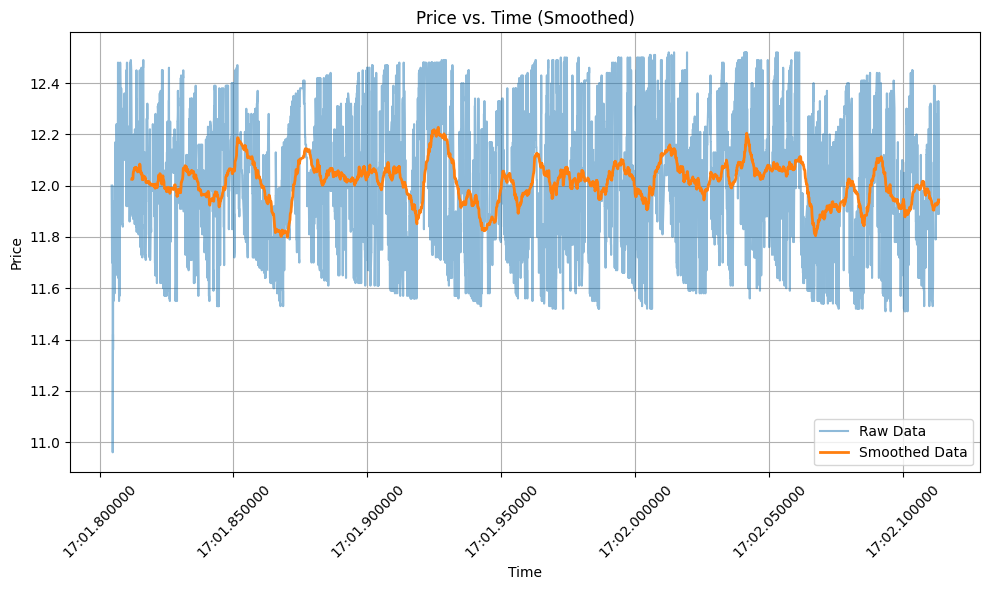

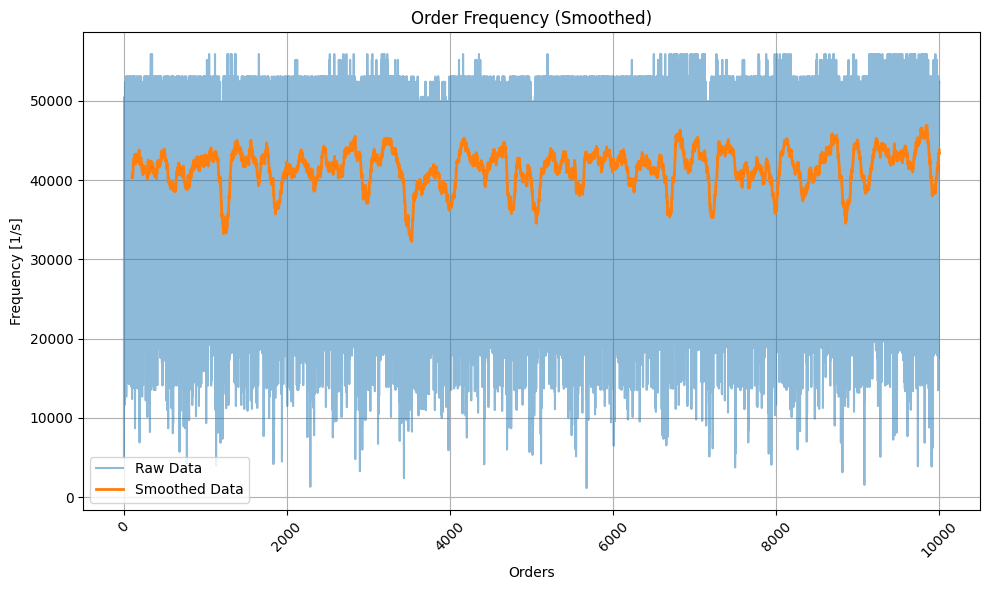

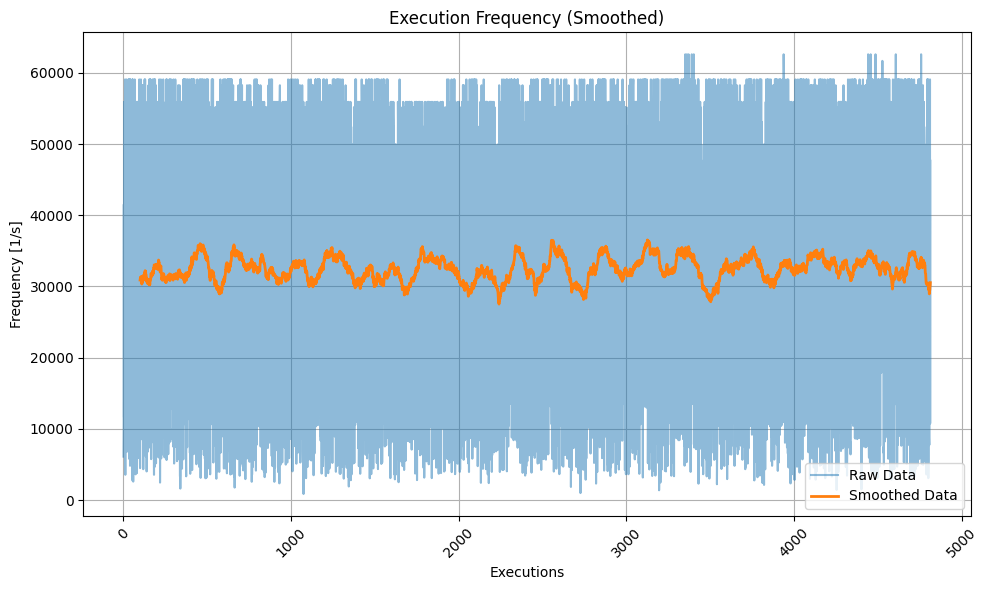

In [29]:
importlib.reload(generator)
from generator import MonitoringTools

monitor = MonitoringTools(ME)
monitor.execution_price()
monitor.order_frequency()
monitor.execution_frequency()